In [2273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
## ANN
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st

In [2274]:
## Load the dataset

df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [2275]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [2276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [2277]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [2278]:
## Exploratory Analysis
numeric_var=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
ex_df=df.loc[:,numeric_var]

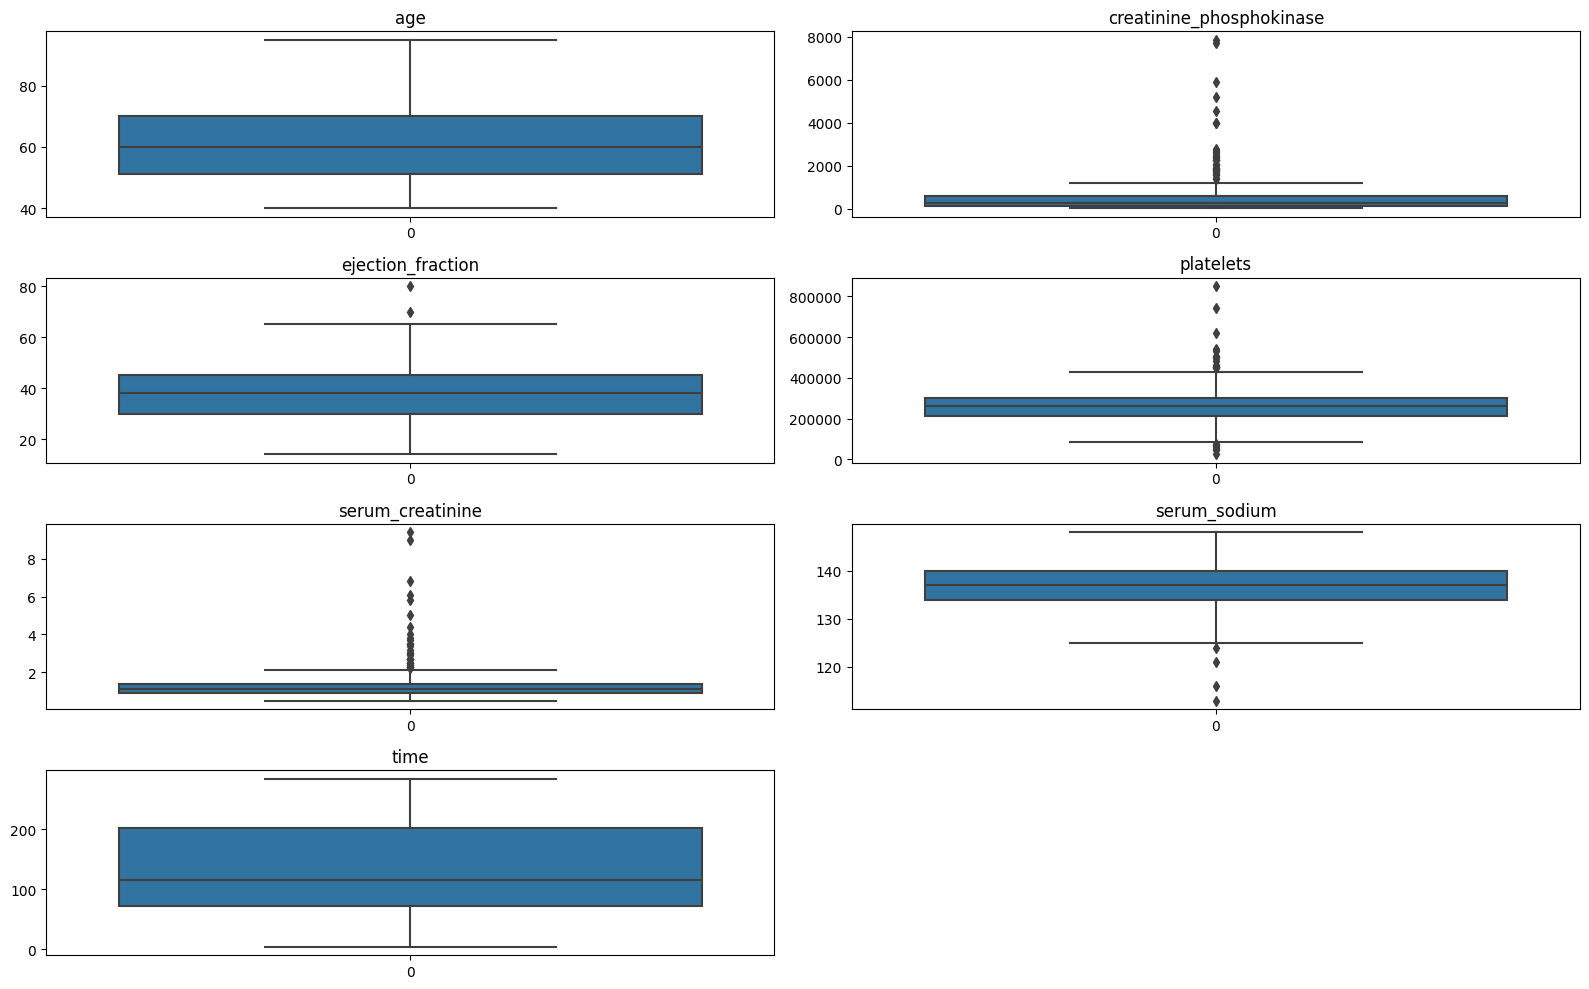

In [2279]:
plt.figure(figsize=(16,10))

for i in range(len(ex_df.columns)):
    plt.subplot(4,2, i+1)
    sns.boxplot(ex_df[ex_df.columns[i]])
    plt.title(ex_df.columns[i])
    plt.tight_layout()

plt.show()


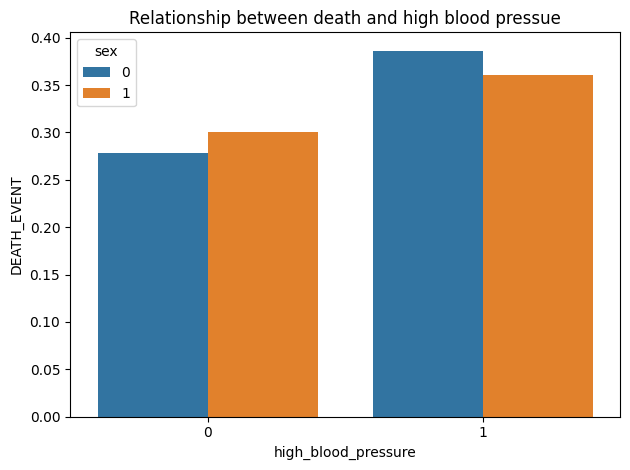

In [2280]:
## relationship between high_blood_pressure in both male and female and DEATH_EVENT

sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', hue='sex',data=df, errorbar=None)
plt.title('Relationship between death and high blood pressue')
plt.tight_layout()
plt.show()

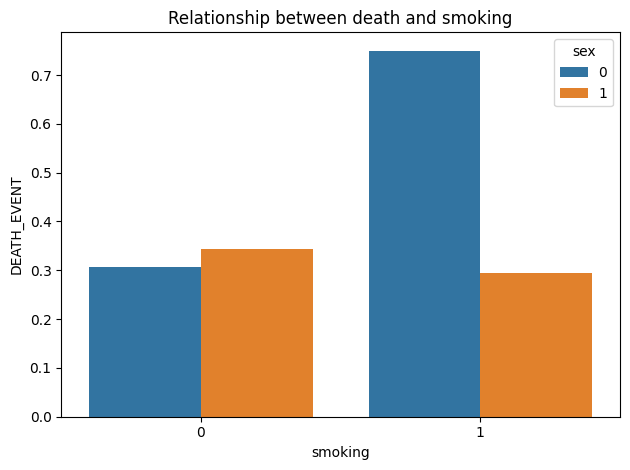

In [2281]:
sns.barplot(x='smoking', y='DEATH_EVENT', hue='sex', data=df, errorbar=None)
plt.title('Relationship between death and smoking')
plt.tight_layout()
plt.show()

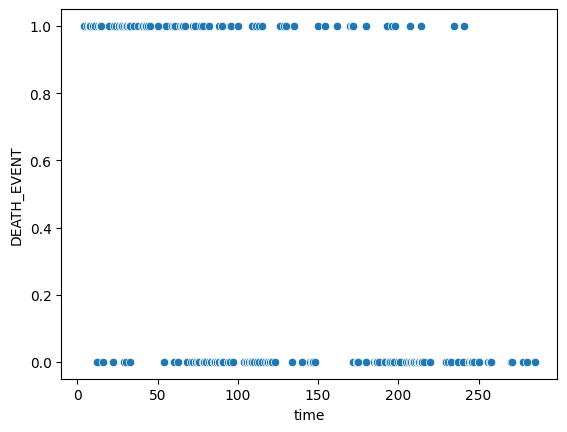

In [2282]:
sns.scatterplot(x='time',y='DEATH_EVENT',data=df)
plt.show()

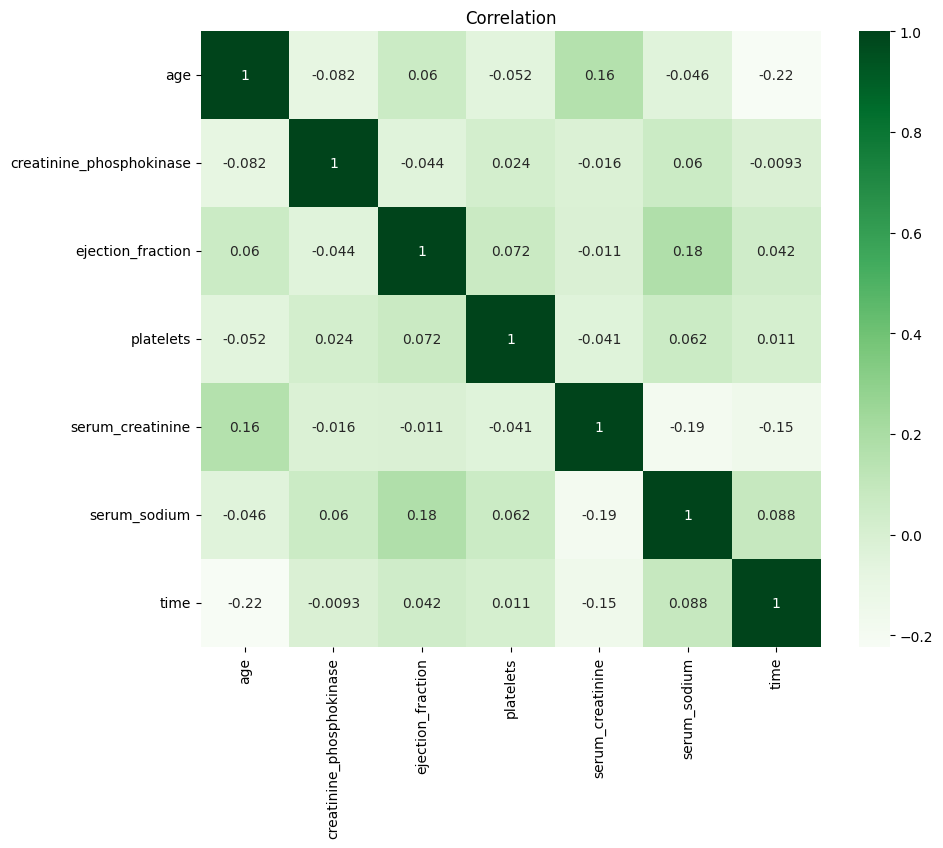

In [2283]:
corr=ex_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap='Greens')
plt.title('Correlation')
plt.show()

In [2284]:
## Create a function to detect outliers and store their indices
def outliers (df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    min_out=q1-(3 * iqr)
    max_out=q3 + (3 * iqr)

    lst=df.index[(df[col] < min_out) | (df[col] > max_out)]

    return lst


In [2285]:
## Creating and index list for multipliers
index_list=[]
numeric_var=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for col in numeric_var:
    index_list.extend(outliers(df,col))

In [2286]:
index_list

[1,
 38,
 52,
 60,
 72,
 103,
 134,
 149,
 163,
 164,
 171,
 208,
 227,
 246,
 250,
 280,
 296,
 297,
 105,
 109,
 296,
 9,
 10,
 28,
 31,
 35,
 39,
 48,
 52,
 65,
 117,
 124,
 129,
 131,
 203,
 217,
 228,
 282,
 199]

In [2287]:
len(index_list)

39

In [2288]:
remove(df, index_list)

In [2289]:
##Remove outliers
def remove (df,lst):
    lst=sorted(set(lst))
    df=df.drop(lst,inplace=True)
    return df

In [2290]:
df_new=df
df_new.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,60.882954,0.446565,389.973282,0.423664,38.263359,0.362595,258625.865115,1.195763,136.702290,0.637405,0.316794,131.900763,0.297710
std,11.789116,0.498088,384.122819,0.495084,11.945410,0.481669,84260.460301,0.429590,4.171964,0.481669,0.466117,77.023145,0.458126
min,40.000000,0.000000,30.000000,0.000000,14.000000,0.000000,25100.000000,0.600000,116.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,210250.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,231.000000,0.000000,38.000000,0.000000,262500.000000,1.100000,137.000000,1.000000,0.000000,118.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,300750.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,1896.000000,1.000000,80.000000,1.000000,543000.000000,2.700000,148.000000,1.000000,1.000000,285.000000,1.000000


In [2291]:
## Normalise non boolean columns

df_new['age'] = (df_new['age'] - df_new['age'].min()) / (df_new['age'].max() - df_new['age'].min())
df_new['creatinine_phosphokinase'] = (df_new['creatinine_phosphokinase'] - df_new['creatinine_phosphokinase'].min()) / (df_new['creatinine_phosphokinase'].max() - df_new['creatinine_phosphokinase'].min())
df_new['ejection_fraction'] = (df_new['ejection_fraction'] - df_new['ejection_fraction'].min()) / (df_new['ejection_fraction'].max() - df_new['ejection_fraction'].min())
df_new['platelets'] = (df_new['platelets'] - df_new['platelets'].min()) / (df_new['platelets'].max() - df_new['platelets'].min())
df_new['serum_creatinine'] = (df_new['serum_creatinine'] - df_new['serum_creatinine'].min()) / (df_new['serum_creatinine'].max() - df_new['serum_creatinine'].min())
df_new['serum_sodium'] = (df_new['serum_sodium'] - df_new['serum_sodium'].min()) / (df_new['serum_sodium'].max() - df_new['serum_sodium'].min())
df_new['time'] = (df_new['time'] - df_new['time'].min()) / (df_new['time'].max() - df_new['time'].min())

In [2292]:
df_new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.295820,0,0.090909,1,0.463217,0.619048,0.43750,1,0,0.000000,1
2,0.454545,0,0.062165,0,0.090909,0,0.264337,0.333333,0.40625,1,1,0.010676,1
3,0.181818,1,0.043408,0,0.090909,0,0.357019,0.619048,0.65625,1,0,0.010676,1
4,0.454545,1,0.069668,1,0.090909,0,0.582931,1.000000,0.00000,0,0,0.014235,1
5,0.909091,1,0.009110,0,0.393939,1,0.345433,0.714286,0.50000,1,1,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.218182,0,0.085745,1,0.363636,0,0.689129,0.190476,0.75000,1,1,0.903915,0
293,0.418182,1,0.039121,1,0.318182,0,0.297162,0.142857,0.62500,1,1,0.946619,0
294,0.400000,0,0.016613,1,0.363636,1,0.250821,0.238095,0.84375,1,1,0.946619,0
295,0.272727,0,0.959271,0,0.363636,0,0.472871,0.285714,0.71875,0,0,0.950178,0


In [2293]:
## split the data into independent and dependent variable
#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

x=df_new.drop(['DEATH_EVENT'],axis=1)
y=df_new['DEATH_EVENT']

In [2294]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 32)

In [2295]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
3,0.181818,1,0.043408,0,0.090909,0,0.357019,0.619048,0.65625,1,0,0.010676
281,0.545455,0,0.295820,0,0.393939,0,0.050010,1.000000,0.62500,1,1,0.875445
34,0.454545,0,0.034298,1,0.545455,1,0.314539,0.190476,0.75000,1,0,0.088968
79,0.272727,0,0.163987,0,0.469697,1,0.577138,0.142857,0.75000,0,0,0.249110
178,0.418182,1,0.049303,1,0.696970,0,0.467079,0.285714,0.90625,1,0,0.508897
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.345455,1,0.133976,1,0.166667,1,0.534659,0.190476,0.78125,0,0,0.263345
287,0.090909,0,0.295820,1,0.621212,0,1.000000,0.190476,0.50000,0,0,0.875445
101,0.636364,0,0.295820,0,0.469697,1,0.460046,0.276190,0.65625,1,0,0.295374
53,0.545455,1,0.020900,1,0.545455,1,0.629272,0.190476,0.56250,0,0,0.142349


In [2296]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [2297]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
144,1,1
175,0,0
148,1,1
256,0,0
17,1,1
11,1,1
54,1,1
159,0,0
192,0,0
200,0,0


In [2298]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print('Accuracy Logistic Regression:',accuracy_LR)
print('Confusion Matrix:\n',conf_mat)

Accuracy Logistic Regression: 0.8679245283018868
Confusion Matrix:
 [[34  4]
 [ 3 12]]


In [2299]:
## ANN ##

##initialise model
model=Sequential()

## set up the layers
##input layer
model.add(Dense(units=40, kernel_initializer='uniform', activation='relu', input_dim=12))
## hidden layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))


## regularisation
## regularisation
model.add(Dropout(0.05))
## output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
## compiling the ANN

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es=EarlyStopping( 
    monitor='val_loss',
    patience=200,
    verbose=1,
    mode=min
)
mc=ModelCheckpoint(
    'best_m.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)


2023-02-23 13:31:30.854 WARNING tensorflow: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.


In [2300]:
## train the model   validation_split is 30% of 80% training data. This is NOT the test data

history= model.fit(X_train, y_train, batch_size=10, epochs=300, validation_split=0.2)

Epoch 1/300
17/17 [==============================] - 2s 19ms/step - loss: 0.6912 - accuracy: 0.7066 - val_loss: 0.6891 - val_accuracy: 0.6905
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.7006 - val_loss: 0.6804 - val_accuracy: 0.6905
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.7006 - val_loss: 0.6576 - val_accuracy: 0.6905
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.7006 - val_loss: 0.6237 - val_accuracy: 0.6905
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.7006 - val_loss: 0.6121 - val_accuracy: 0.6905
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7006 - val_loss: 0.6057 - val_accuracy: 0.6905
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.7006 - val_loss: 0.6002 - val_accuracy: 0.6905
Epoch 8/300


In [2301]:
## make prediction

y_pred_ann= model.predict(X_test)
y_pred_ann=pd.DataFrame(y_pred_ann)
y_pred_ann=np.where(y_pred_ann>0.5, 1,0)
y_pred_ann

2/2 [==============================] - 0s 4ms/step


array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [2302]:
## y_test is a one dimensional array
print(y_test.shape)
print(y_pred_ann.shape)

(53,)
(53, 1)


In [2303]:
## convert y_pred_ann

y_pred_ann=y_pred_ann.flatten()

In [2304]:
pd.DataFrame({'Actual': y_test,'Predicted': y_pred_ann})

,Actual,Predicted
144,1,1
175,0,0
148,1,1
256,0,0
17,1,1
11,1,1
54,1,1
159,0,0
192,0,0
200,0,0


In [2305]:
## classification report

print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.78      0.93      0.85        15

    accuracy                           0.91        53
   macro avg       0.87      0.91      0.89        53
weighted avg       0.92      0.91      0.91        53



In [2306]:
cm=confusion_matrix(y_test, y_pred_ann)
cm

array([[34,  4],
       [ 1, 14]], dtype=int64)

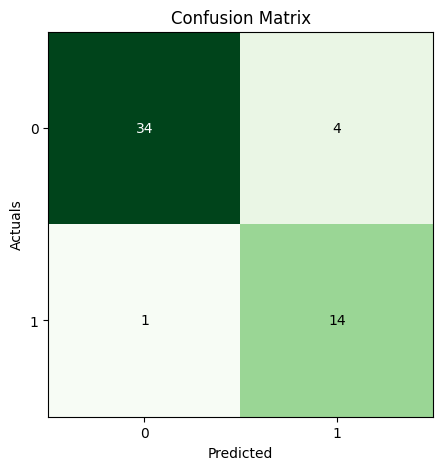

In [2307]:
## plot the confusion matrix

fig, ax= plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix')
plt.show()

In [2308]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.914035


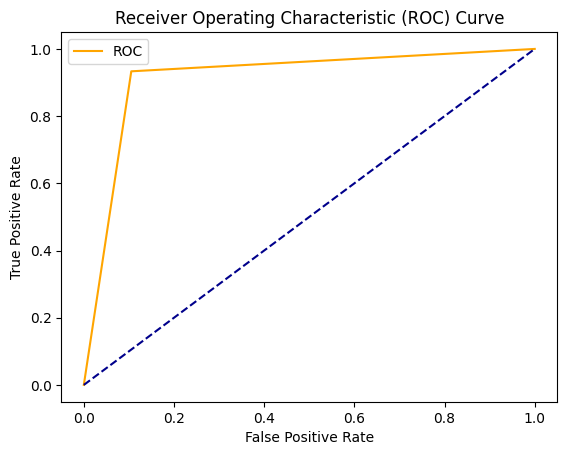

In [2309]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [2310]:
## ANN using MLPClassifier
ann_model=MLPClassifier()
ann_model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [2311]:
##  make the prediction
y_pred_mlp = ann_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})

,Actual,Predicted
144,1,1
175,0,0
148,1,1
256,0,0
17,1,1
11,1,1
54,1,1
159,0,0
192,0,0
200,0,0


In [2312]:
## evaluate the model accuracy
accuracy_ann = accuracy_score(y_test, y_pred_mlp)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_mlp)

print(accuracy_ann)
print(conf_mat)

0.8679245283018868
[[34  4]
 [ 3 12]]


In [2313]:
## classification report

print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.75      0.80      0.77        15

    accuracy                           0.87        53
   macro avg       0.83      0.85      0.84        53
weighted avg       0.87      0.87      0.87        53



In [2314]:
cm=conf_mat
cm

array([[34,  4],
       [ 3, 12]], dtype=int64)

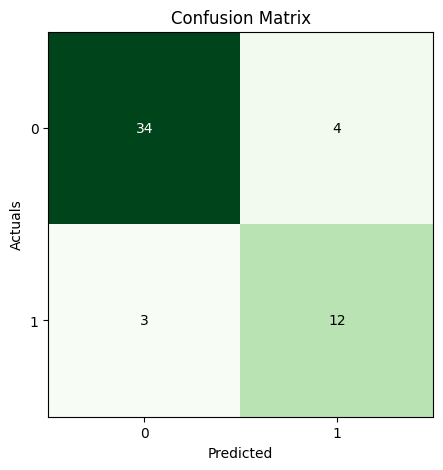

In [2315]:
## plot the confusion matrix

fig, ax= plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix')
plt.show()

In [2316]:
auc = roc_auc_score(y_test, y_pred_mlp)
print('AUC: %f' %auc)

AUC: 0.847368


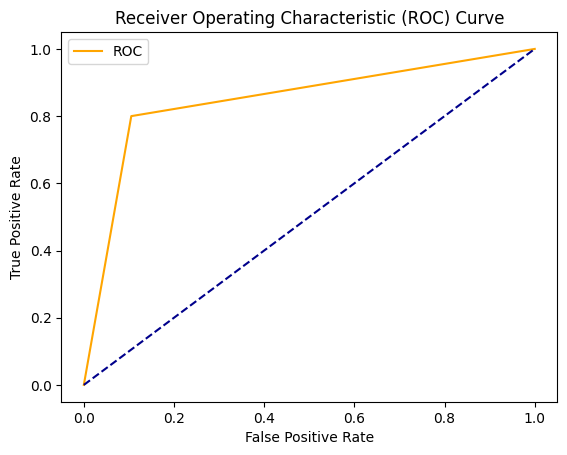

In [2317]:
fpr, tpr = roc_curve(y_test, y_pred_mlp)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [2318]:
## save the ANN model
model.save('model_ANN')

2023-02-23 13:33:42.163 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: model_ANN\assets


2023-02-23 13:33:43.413 INFO    tensorflow: Assets written to: model_ANN\assets
